# Análisis de Anime

In [2]:
#Importamos las librerías necesarias inicialmente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Lectura de datasets

El data set se ha obtenido de Kaggle: https://www.kaggle.com/datasets/tanishksharma9905/top-popular-anime

#### Detalles del Dataset

Este conjunto de datos contiene información detallada sobre las principales series y películas de anime, clasificadas en MyAnimeList, obtenido a través de la API de Jikan — una API REST no oficial para MyAnimeList.

Incluye datos de más de 1,100 páginas (más de 22,000 entradas de anime), lo que lo convierte en uno de los conjuntos de datos de anime de código abierto más completos disponibles.

id	Unique identifier (MyAnimeList ID)
name	English title of the anime (fallback to original or Japanese title)
genres	Comma-separated list of genres
type	Type of anime (e.g. TV, Movie, OVA)
episodes	Number of episodes
status	Airing status (Finished, Airing, Upcoming)
aired_from	Start date of airing
aired_to	End date of airing
duration_per_ep	Duration per episode
score	User score (rating out of 10)
scored_by	Number of users who rated it
rank	Rank on MyAnimeList
rating	Age rating (e.g., PG-13, R)
studios	Studios involved in production
producers	Producers listed
image	URL to the cover image
trailer	URL to the trailer video
synopsis	Short plot summary


In [3]:


anime = pd.read_csv('https://raw.githubusercontent.com/glandricina10/notebooks2/main/popular_anime.csv', parse_dates=['aired_from', 'aired_to'])



In [4]:
anime.head()

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
0,52991,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy",TV,28.0,Finished Airing,2023-09-29 00:00:00+00:00,2024-03-22 00:00:00+00:00,24 min per ep,9.30,676737.0,1.0,PG-13 - Teens 13 or older,Madhouse,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",https://cdn.myanimelist.net/images/anime/1015/...,https://www.youtube.com/watch?v=ZEkwCGJ3o7M,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,2009-04-05 00:00:00+00:00,2010-07-04 00:00:00+00:00,24 min per ep,9.10,2223666.0,2.0,R - 17+ (violence & profanity),Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",https://cdn.myanimelist.net/images/anime/1208/...,https://www.youtube.com/watch?v=1ac3_YdSSy0,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24.0,Finished Airing,2011-04-06 00:00:00+00:00,2011-09-14 00:00:00+00:00,24 min per ep,9.07,1467570.0,3.0,PG-13 - Teens 13 or older,White Fox,"Frontier Works, Media Factory, Kadokawa Shoten...",https://cdn.myanimelist.net/images/anime/1935/...,https://www.youtube.com/watch?v=27OZc-ku6is,Eccentric scientist Rintarou Okabe has a never...
3,38524,Attack on Titan Season 3 Part 2,"Action, Drama, Suspense",TV,10.0,Finished Airing,2019-04-29 00:00:00+00:00,2019-07-01 00:00:00+00:00,23 min per ep,9.05,1700946.0,4.0,R - 17+ (violence & profanity),Wit Studio,"Production I.G, Dentsu, Mainichi Broadcasting ...",https://cdn.myanimelist.net/images/anime/1517/...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Seeking to restore humanity's diminishing hope...
4,28977,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51.0,Finished Airing,2015-04-08 00:00:00+00:00,2016-03-30 00:00:00+00:00,24 min per ep,9.05,264260.0,5.0,PG-13 - Teens 13 or older,Bandai Namco Pictures,"TV Tokyo, Aniplex, Dentsu",https://cdn.myanimelist.net/images/anime/3/720...,NaN,"Gintoki, Shinpachi, and Kagura return as the f..."


Ahora vamos a cambiar el formato de las fechas

In [5]:
anime['aired_from_year'] = anime['aired_from'].dt.year

anime['aired_to_year'] = anime['aired_to'].dt.year

In [29]:
anime['duration'] = anime['aired_to_year'] - anime['aired_from_year']

In [30]:
anime.describe(include = 'all')

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,...,rank,rating,studios,producers,image,trailer,synopsis,aired_from_year,aired_to_year,duration
count,28825.000000,28825,28825.0,28825,28825.000000,28825,28825.0,28825.0,28825,28825.000000,...,28825.000000,28825,28825.0,28825.0,28825,28825.0,28825.0,28825.000000,28825.000000,28825.000000
unique,NaN,28350,936.0,10,NaN,3,9252.0,5487.0,345,NaN,...,NaN,7,1863.0,5121.0,28315,5345.0,21992.0,NaN,NaN,NaN
top,NaN,Spirit Guardians,0.0,TV,NaN,Finished Airing,0.0,0.0,24 min per ep,NaN,...,NaN,PG-13 - Teens 13 or older,0.0,0.0,https://cdn.myanimelist.net/img/sp/icon/apple-...,0.0,0.0,NaN,NaN,NaN
freq,NaN,5,6069.0,8249,NaN,27813,955.0,17895.0,2078,NaN,...,NaN,10413,11889.0,15373.0,293,23351.0,5368.0,NaN,NaN,NaN
mean,34131.945117,NaN,NaN,NaN,13.453773,NaN,NaN,NaN,NaN,4.128041,...,8017.527910,NaN,NaN,NaN,NaN,NaN,NaN,1942.654258,762.595282,-1180.058977
std,19617.957463,NaN,NaN,NaN,46.258312,NaN,NaN,NaN,NaN,3.143319,...,7152.834035,NaN,NaN,NaN,NaN,NaN,NaN,359.918027,975.818452,988.974633
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-2027.000000
25%,15979.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,0.000000,-2015.000000
50%,38070.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,5.710000,...,7040.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,0.000000,-1992.000000
75%,51060.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,6.630000,...,14235.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,2009.000000,0.000000


#### Correcciones y limpieza del data set

Debemos asegurar que los datos contenidos en el data set son totalmente claros.Por lo que se debe primero lo que contiene el cvs, si exiten datos de poco valor o nulos o duplicidades de estos.

In [31]:
anime.type.unique()

array(['TV', 'TV Special', 'Movie', 'OVA', 'Music', 'ONA', 'Special',
       'PV', 'CM', 0], dtype=object)

#### Información del data set

In [32]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               28825 non-null  int64  
 1   name             28825 non-null  object 
 2   genres           28825 non-null  object 
 3   type             28825 non-null  object 
 4   episodes         28825 non-null  float64
 5   status           28825 non-null  object 
 6   aired_from       28825 non-null  object 
 7   aired_to         28825 non-null  object 
 8   duration_per_ep  28825 non-null  object 
 9   score            28825 non-null  float64
 10  scored_by        28825 non-null  float64
 11  rank             28825 non-null  float64
 12  rating           28825 non-null  object 
 13  studios          28825 non-null  object 
 14  producers        28825 non-null  object 
 15  image            28825 non-null  object 
 16  trailer          28825 non-null  object 
 17  synopsis    

#### Valores nulos o incorrectos

Vamos a intentar remplazar los valores nulos


In [33]:
#1-Ver cuantos valors nulos hay en cada variable
anime.isnull().sum()


,0
id,0
name,0
genres,0
type,0
episodes,0
status,0
aired_from,0
aired_to,0
duration_per_ep,0
score,0


In [34]:
#2- Averiguar los valores que faltan y replazarlos por 0
anime.fillna(0,inplace=True)

In [35]:
# 3- Revisar si el dataset contiene datos duplicados
sum(anime.duplicated())

218

Como podemos observar el siguiente dataset contiene 12 variables que se pueden analizar a través de una serie de preguntas que nos permita explicar mejor la informacion que contiene el dataset.

PREGUNTAS
1. Influye el género en la cantidad de compras
2. La edad como factor de influencia en la cantidad de compras
3. La categoría de la ciudad inlfuye en las compras y en los tipos de compra
4. El estado civil como factor condicional de la cantidad de compras


 # Gráfico 1: Cantidad de animes por status

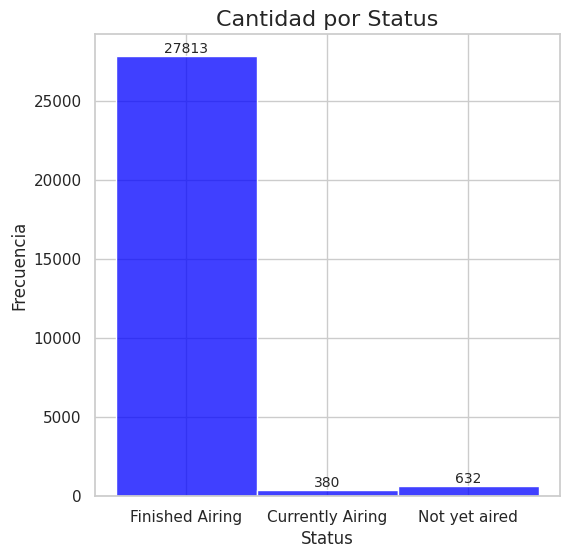

In [36]:
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# --- Gráfico 1: Cantidad de compras según su frecuencia ---
plt.figure(figsize=(6, 6))
ax = sns.histplot(anime['status'], kde=False, bins=50, color='blue')

# Añadir etiquetas con el valor de cada barra
for p in ax.containers:
    for rect in p:
        height = rect.get_height()
        # Añadir etiqueta en la parte superior de cada barra
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # coordenada x del centro de la barra
            height,                                # coordenada y en la altura de la barra
            f'{int(height)}',                      # texto (cantidad)
            ha='center', va='bottom', fontsize=10
        )

plt.title('Cantidad por Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


Analicemos cuantos programas aún siguen en el aire y ver cuales son los mas antiguos.

/tmp/ipython-input-37-1887718217.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




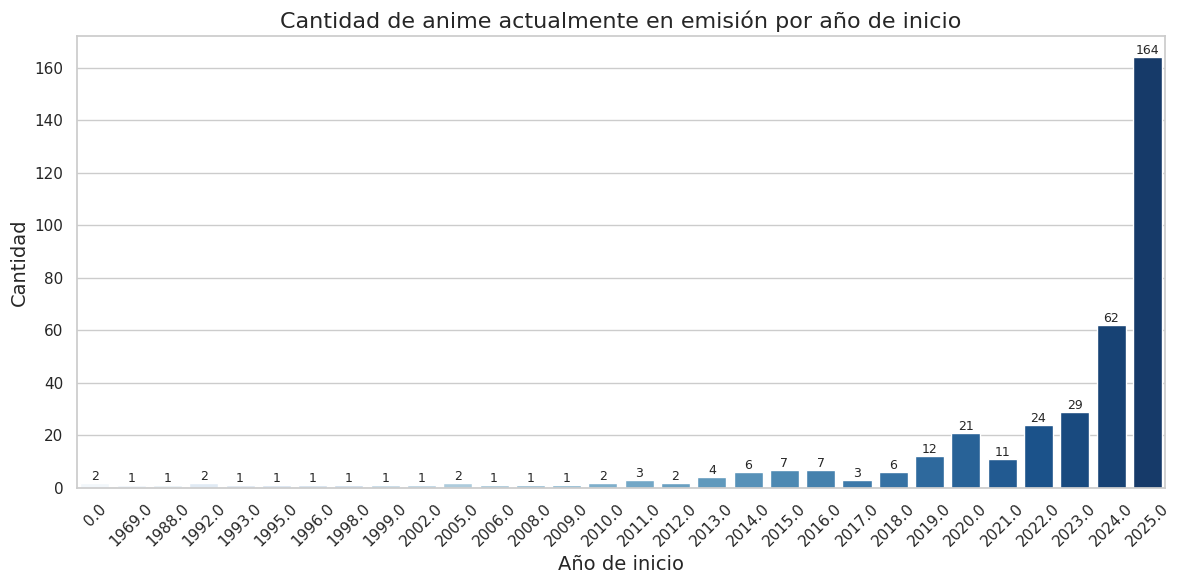

In [37]:
# Filtrar los datos por estado "Currently Airing"
currently_airing = anime[anime['status'] == 'Currently Airing']

# Contar la cantidad de anime por año de "aired_from_year"
contar_por_year = currently_airing['aired_from_year'].value_counts().sort_index()

# Crear un DataFrame para mejor manejo en seaborn
df_contar = contar_por_year.reset_index()
df_contar.columns = ['Año', 'Cantidad']

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contar, x='Año', y='Cantidad', palette='Blues')

# Agregar cantidad en cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Cantidad de anime actualmente en emisión por año de inicio', fontsize=16)
plt.xlabel('Año de inicio', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # Gráfico 2: Cantidad por género

In [38]:
# Procesar los géneros asegurando que todos los valores sean cadenas
all_genres = anime['genres'].dropna().apply(lambda x: str(x).split(', '))

# Continuar con el análisis...
genres_list = [genre for sublist in all_genres for genre in sublist]

from collections import Counter
genre_counts = Counter(genres_list)

# Convertir a DataFrame para graficar
genre_freq_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Crear gráfico
fig = px.bar(
    genre_freq_df,
    x='Genre',
    y='Count',
    title='Frecuencia de géneros en el dataset de anime',
    labels={'Count': 'Cantidad de animes', 'Genre': 'Género'},
    color='Genre'
)

# Opcional: ajustar la visualización
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Género",
    yaxis_title="Cantidad de animes",
    width=900,
    height=600
)

fig.show()

En nuestro datasets hay muchas filas sin género asignado. Entonces dejando de lado ese aspecto, podemos afirmar que en la industria del anime figuran como dominantes los géneros comedia, fantasía y acción.


/tmp/ipython-input-39-77238661.py:2: FutureWarning:

The provided callable <function mean at 0x7bf7b0bc63e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



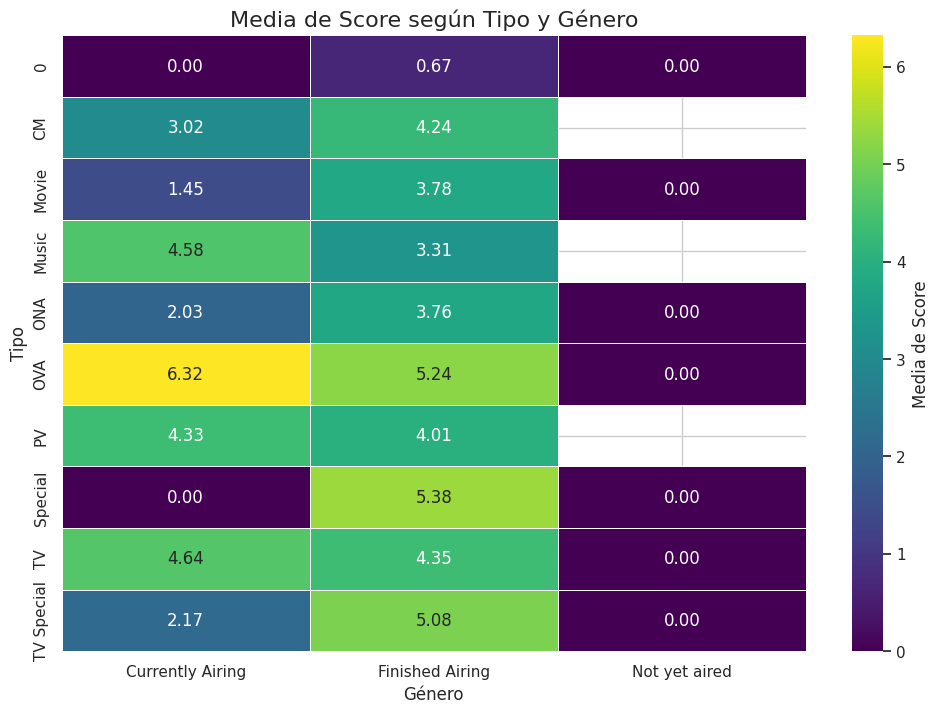

In [39]:
# Crear la tabla dinámica con la media del score según género y status
pivot_data = anime.pivot_table(values='score', index='type', columns='status', aggfunc=np.mean)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Media de Score'})
plt.title('Media de Score según Tipo y Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Tipo', fontsize=12)
plt.show()

#### Top 5 de animes con mayor duración (Finished Airing)




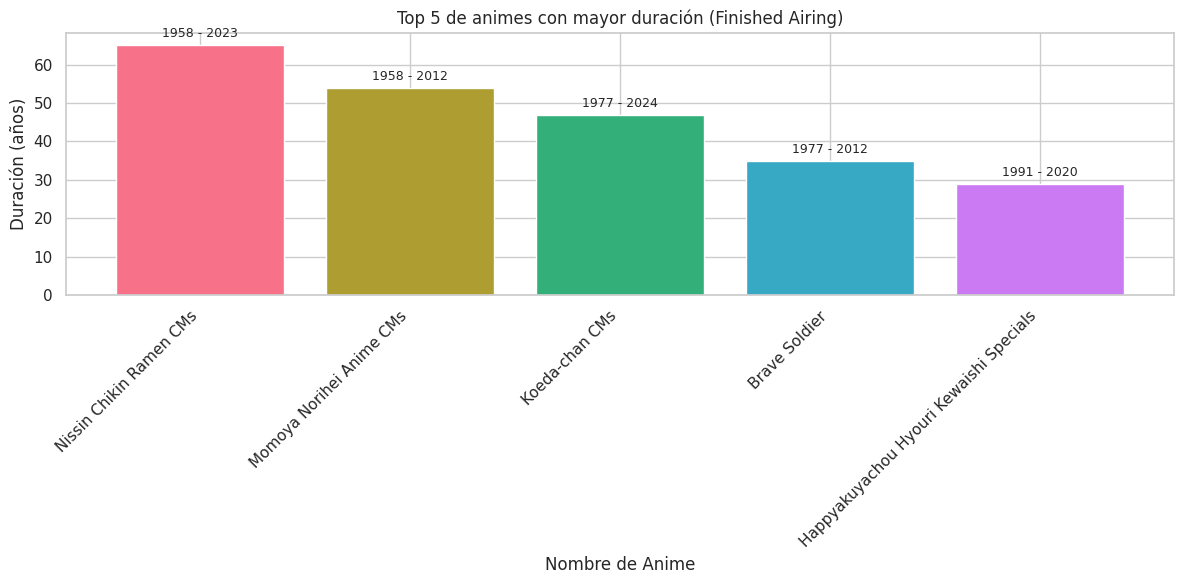

In [49]:
import matplotlib.pyplot as plt

# Filtrar los animes que tienen status "Finished Airing"
anime_finished = anime[anime['status'] == 'Finished Airing']
# Convertir a entero para las columnas de años
anime['aired_from_year'] = anime['aired_from_year'].astype(int)
anime['aired_to_year'] = anime['aired_to_year'].astype(int)

# Ordenar por duración en orden descendente y coger los 5 primeros
top5_duration = anime_finished.sort_values(by='duration', ascending=False).head(5)

# Crear una lista de colores
colors = sns.color_palette('husl', n_colors=5)

# Crear la figura
plt.figure(figsize=(12, 6))

# Dibujar las barras
for i, (name, duration, start_year, end_year) in enumerate(zip(
        top5_duration['name'],
        top5_duration['duration'],
        top5_duration['aired_from_year'],
        top5_duration['aired_to_year'])):
    plt.bar(name, duration, color=colors[i])
    # Agregar etiquetas de años encima de cada barra
    label = f"{start_year} - {end_year}"
    plt.text(i, duration + max(top5_duration['duration']) * 0.02, label, ha='center', va='bottom', fontsize=9)

# Configurar rotación y etiquetas
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre de Anime')
plt.ylabel('Duración (años)')
plt.title('Top 5 de animes con mayor duración (Finished Airing)')
plt.tight_layout()

plt.show()

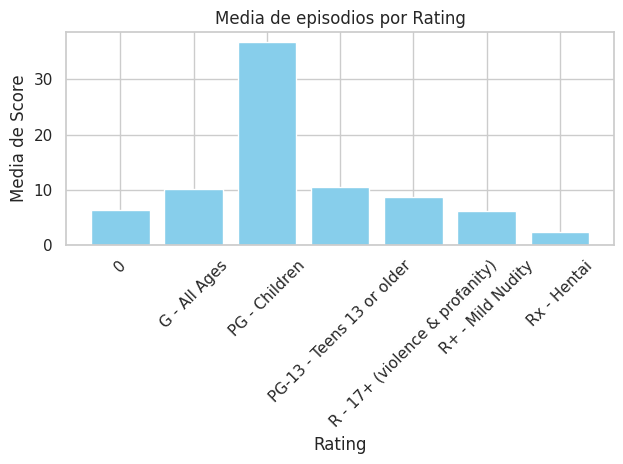

In [55]:
import matplotlib.pyplot as plt

# Supón que tienes el DataFrame 'data' y quieres graficar la media del score por rating
mean_score_by_rating = anime.groupby('rating')['episodes'].mean()

# Obtener las categorías (ratings)
categories = mean_score_by_rating.index

# Posiciones en el eje x
x_pos = range(len(categories))

# Graficar usando las posiciones
plt.bar(x_pos, mean_score_by_rating.values, color='skyblue')

# Ajustar las etiquetas del eje x
plt.xticks(x_pos, categories, rotation=45)

plt.xlabel('Rating')
plt.ylabel('Media de Score')
plt.title('Media de episodios por Rating')
plt.tight_layout()
plt.show()

In [59]:
import plotnine
from plotnine import *

!pip install scikit-learn
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 12.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


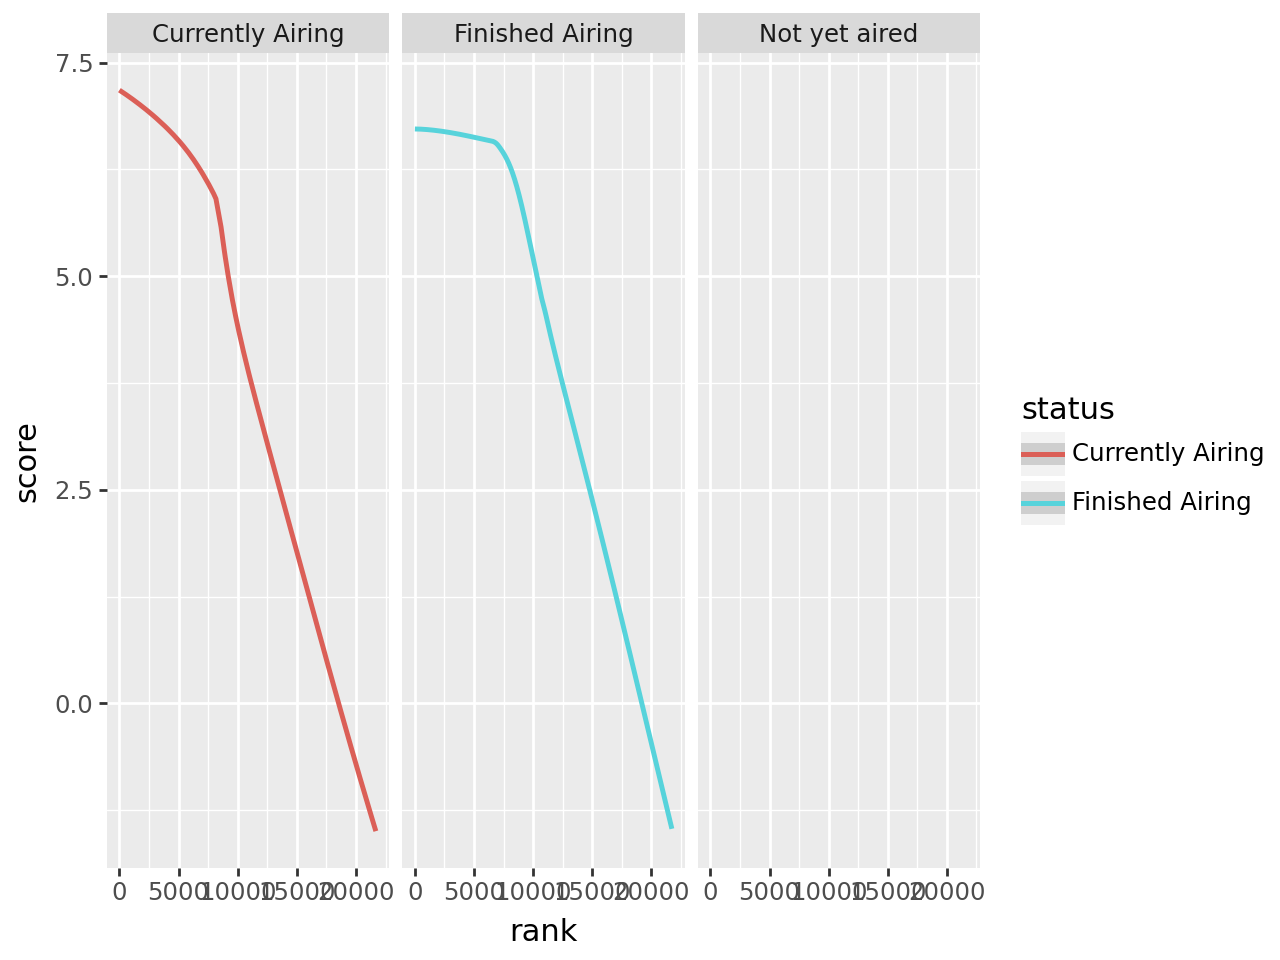

In [62]:
import sklearn
import skmisc

(
    ggplot(anime)
    + aes(x = 'rank',
          y = 'score',
         color = 'status')  # What variable to use
    + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
    + facet_grid(cols = "status")
)